In [ ]:
import pandas as pd
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from sklearn.metrics import roc_curve, RocCurveDisplay

In [34]:
df.head()

,Unnamed: 0,family,gene_x,gene_y,similar,seq_x,seq_y,cosine_sim,cosine_sim_row,cosine_sim_avg
0,0,HOM05D000001,AT5G16860,BolC4t27687H,False,ATGATCCGCCGCCTTCTCATCCCCAACGCCGCCGCAAAATCTCACC...,ACCCTGGAGGGGCGGGGTCAAGCTAGGTCGTTATACACCTGGGTAA...,0.695995,0.646869,0.702245
1,1,HOM05D000001,AT5G16860,BolC6t38454H,False,ATGATCCGCCGCCTTCTCATCCCCAACGCCGCCGCAAAATCTCACC...,CGGGGCAACTGCCGGTCTGCCTCCCTGTGTTATATAAAGGGGTCCT...,0.729185,0.677421,0.731330
2,2,HOM05D000001,AT5G16860,BolC7t43064H,False,ATGATCCGCCGCCTTCTCATCCCCAACGCCGCCGCAAAATCTCACC...,CATGTCCGATGGAGATAGGACCCTCTGCCAGCAGCCACTTGGGGGA...,0.762200,0.707166,0.763609
3,3,HOM05D000001,AT5G16860,Aa31LG8G3100,False,ATGATCCGCCGCCTTCTCATCCCCAACGCCGCCGCAAAATCTCACC...,GCGCTAGTTCGGTATAGGCGCGCTATGGACGCCTACTCGTGCCTTA...,0.781536,0.726482,0.783024
4,4,HOM05D000001,AT5G16860,Aa31sc601G20,False,ATGATCCGCCGCCTTCTCATCCCCAACGCCGCCGCAAAATCTCACC...,GGTCTTCTCGAGTGCTCCAGTTCGTTAGACATGCTAGTGTGCTTCG...,0.717307,0.666113,0.724195


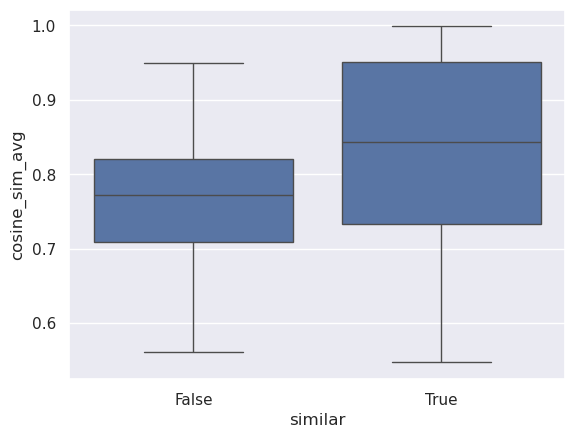

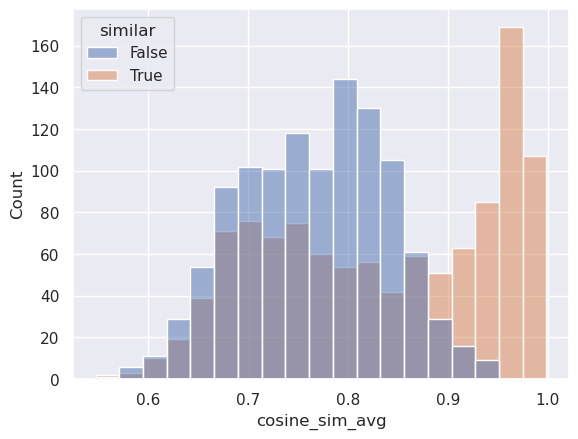

In [38]:
sns.boxplot(data=df, y="cosine_sim_avg", x="similar")
plt.show()
sns.histplot(data=df, x="cosine_sim_avg", hue="similar")
plt.show()

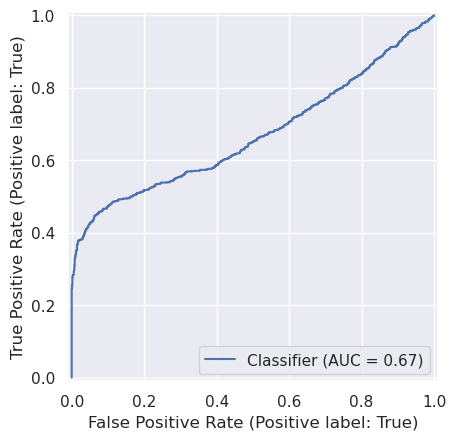

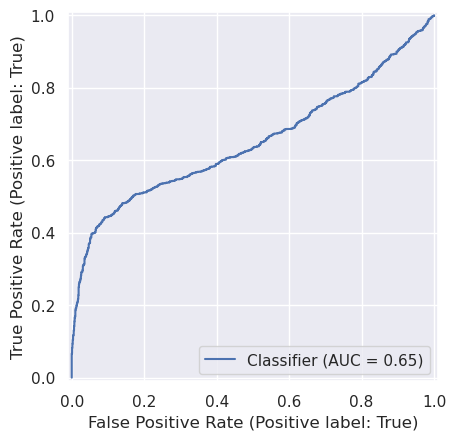

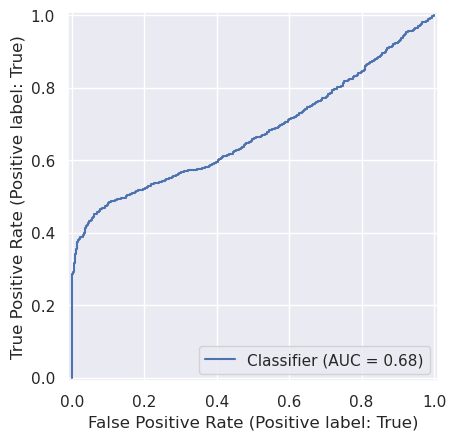

In [40]:
# fpr, tpr, treshold = roc_curve(df["Similar"].tolist(), df["cosine_sim"].tolist())
# print(treshold)
RocCurveDisplay.from_predictions(df["similar"].tolist(), df["cosine_sim"].tolist(), pos_label=True)
RocCurveDisplay.from_predictions(df["similar"].tolist(), df["cosine_sim_row"].tolist(), pos_label=True)
RocCurveDisplay.from_predictions(df["similar"].tolist(), df["cosine_sim_avg"].tolist(), pos_label=True)


# Old code


In [81]:
print(df.shape)
print(df.value_counts(subset=["len_profile_x", "len_profile_y"]).reset_index())
df.sort_index(inplace=True)
df.head()

(710, 8)
    len_profile_x  len_profile_y  count
0               3              3     81
1               4              5     56
2               3              4     53
3               4              4     43
4               3              5     39
5               4              3     39
6               3              6     32
7               5              4     31
8               5              5     31
9               4              7     27
10              6              6     26
11              7              5     26
12              6              5     24
13              4              6     23
14              6              7     22
15              5              6     22
16              7              6     21
17              5              3     20
18              3              7     18
19              6              4     18
20              5              7     14
21              7              4     14
22              6              3     12
23              7              

,genome_x,chr_x,len_profile_x,genome_y,chr_y,len_profile_y,seq_x,seq_y
3498,aar,sc-37,6,bol,C7,7,TATGGTACACTGTGTTCATCTACTTTGGAGAGAAGACCAAAGTATG...,CACTCTTCAGCTGCTTCCTTGGAGAGAAGACCGAAGAAAGGATTAG...
3500,aar,LG-1,7,bol,C5,7,TAATTCTGTTGCCTACCTCGTCCACGGCCAAACCTTCCTCTACCTC...,CATCCAGACTGTTGCCGCCCACGACCTCGTCCACGTCCACGTCCAA...
4048,aar,sc-652,5,bol,C3,5,TCGGAGGTTTCGCTACCAAATCGTATTCTCCGGGATCAAGACTCGC...,CACTTCCAGAGTTCTTCCATGGGGAATCTTCCACGTTCAAGAGCAG...
4049,aar,sc-167,5,bol,C9,5,CACCAATAATCTCCACAAGAACATGACCCATTTCTAAAATGATGAA...,TGGCTTTAGCTTCTTTGTTCGCTCGCTCTCGTAGAACAGCTTCCTC...
4050,aar,sc-167,5,ath,Chr5,5,CACCAATAATCTCCACAAGAACATGACCCATTTCTAAAATGATGAA...,CACCAATAATCTCTGCAGGAACATACTCCATTTCTAAAATGATGAA...


In [ ]:
df_c = df.copy() 
df_c['original_index'] = df_c.index

grouped = df_c.groupby(['len_profile_x', 'len_profile_y'])
shuffled_parts = []

for what, group in grouped:
    # makes sure group is not to small to shuffel
    if len(group) == 1:
        shuffled_parts.append(group)
        print("Error group to small !")
        continue
    
    shuffled_group = group.copy()
    same = True
    # shuffel everything till there are no same combinations as before
    while same:
        shuffled_values = shuffled_group[["genome_y", "chr_y", "len_profile_y", "seq_y"]].sample(frac=1, random_state=None).reset_index(drop=True)
        shuffled_group[["genome_y", "chr_y", "len_profile_y", "seq_y"]] = shuffled_values[["genome_y", "chr_y", "len_profile_y", "seq_y"]].values
        
        if shuffled_group[shuffled_group["seq_y"] == group["seq_y"]]["seq_y"].notna().sum() == 0:
            same = False 

    shuffled_parts.append(shuffled_group)

shuffled_df = pd.concat(shuffled_parts).sort_values("original_index").drop(columns="original_index")
# Check if there are not similar sequences at all
df[df[["seq_y"]] == shuffled_df[["seq_y"]]]["seq_y"].notna().sum()

# write to csv 
# profit

False    603
Name: count, dtype: int64